In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [2]:
file = pd.ExcelFile("COMBINED_NORMAL_ADVANCED_STATS_1984-85_to_2019-20_ver2.xlsx")
data = pd.read_excel(file, 0)
file2 = pd.ExcelFile("2019_20_FINAL_normal_advanced_stats_V2.xlsx")
data_2020 = pd.read_excel(file2, 0)


In [3]:
data = data.drop(columns=['slug', 'key'])
data_2020 = data_2020.drop(columns=['Unnamed: 0'])
year = data['Year']
year_2020 = data_2020['Year']

In [12]:
data_info = data[["name", "positions", "team", "Year"]]
data = data.drop(columns=["name", "positions", "team", "Year"])

In [14]:
info_2020 = data_2020[["name", "positions", "team", "Year"]]
data_2020 = data_2020.drop(columns=["name", "positions", "team", "Year"])

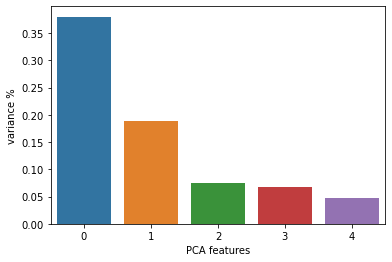

In [40]:
#prelim-filter of 800 minutes
data_f = data.loc[data['minutes_played'] >= 10]
data_2020_f = data_2020.loc[data_2020['minutes_played'] >= 10]

#standardize
std_f = StandardScaler().fit_transform(data_f)
std_2020 = StandardScaler().fit_transform(data_2020_f)

#compute the PCA - 5 components chosen for about 80% of the variance
pca_f = PCA(n_components=5)
p_components = pca_f.fit_transform(std_f)
features = [i for i in range(pca_f.n_components_)]
ax = sns.barplot(x=features, y=pca_f.explained_variance_ratio_)
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

data_pca = pd.DataFrame(p_components)

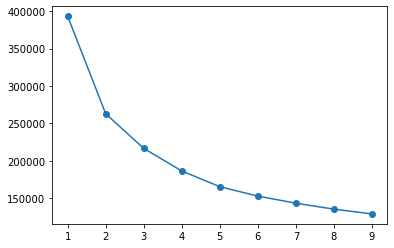

In [41]:
#Algorithm 1: KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i).fit(data_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss, marker='o')

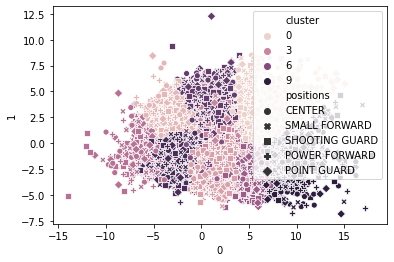

In [42]:
#THREE clusters chosen
kmeans = KMeans(n_clusters=10).fit(data_pca)
vis_df = data_pca
vis_df['cluster'] = kmeans.labels_
vis_df['positions'] = data_info['positions']
sns.scatterplot(data=vis_df, x=0, y=1, hue="cluster", style="positions")